In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from mpl_toolkits.mplot3d import axes3d, Axes3D
from reservoir import new_network
import three_bit_flip_flop as tbff
def plot(inp, output, target, axis):
    interval = inp.shape[0]
    x = np.linspace(0, interval, interval)
    plt.plot(x, inp[:, axis], color="orange")
    plt.plot(x, output[:, axis], color="green")
    plt.plot(x, target[:, axis])

In [5]:
dim_input = 3
dim_reservoir = 1000
dim_output = 3
weight_trained = np.load("weight_1e3_3e6_2e4.npy").item()
r2 = new_network(dim_input, dim_reservoir, dim_output ,weight = weight_trained)

In [6]:
#inp_test, target_test = tbff.generate_input_and_target(dim_input, dim_output, input_duration = 100000, num_pulses = 1000, amplitude=1)
#output_test, reservoir_state = r2.test(inp_test, give_me_reservoir_state = True)
#np.save("reservoir_state_1e5_1e3", reservoir_state)
reservoir_state = np.load("reservoir_state_1e5_1e3.npy")
reservoir_state.shape

(100000, 1000)

In [7]:
pca_r2 = PCA(n_components = 10)
pca_r2.fit(reservoir_state)
pca_r2.explained_variance_ratio_

array([  3.80194211e-01,   3.16077985e-01,   2.88663338e-01,
         4.26094078e-03,   4.13840205e-03,   3.90011314e-03,
         4.96639998e-04,   4.55993703e-04,   4.06839517e-04,
         3.19554032e-04])

In [ ]:
pca_r2.components_.shape
pc = pca_r2.transform(reservoir_state).T

In [27]:
r2.weight.keys()

dict_keys(['input', 'readout', 'recurrent', 'feedback'])

In [28]:
r2_input = r2.weight["input"]
pca_r2.transform(r2_input.T).shape

(3, 10)

In [32]:
r2_readout = r2.weight["readout"]
pca_r2.transform(r2_readout).shape

(3, 10)

In [30]:
r2_recurrent = r2.weight["recurrent"]
r2_rec = pca_r2.transform(r2_recurrent.T).shape
pca_r2.transform(r2_recurrent.T).shape

(1000, 10)

In [31]:
r2_feedback = r2.weight["feedback"]
pca_r2.transform(r2_feedback.T).shape

(3, 10)

In [15]:
reservoir_state.shape

(100000, 1000)

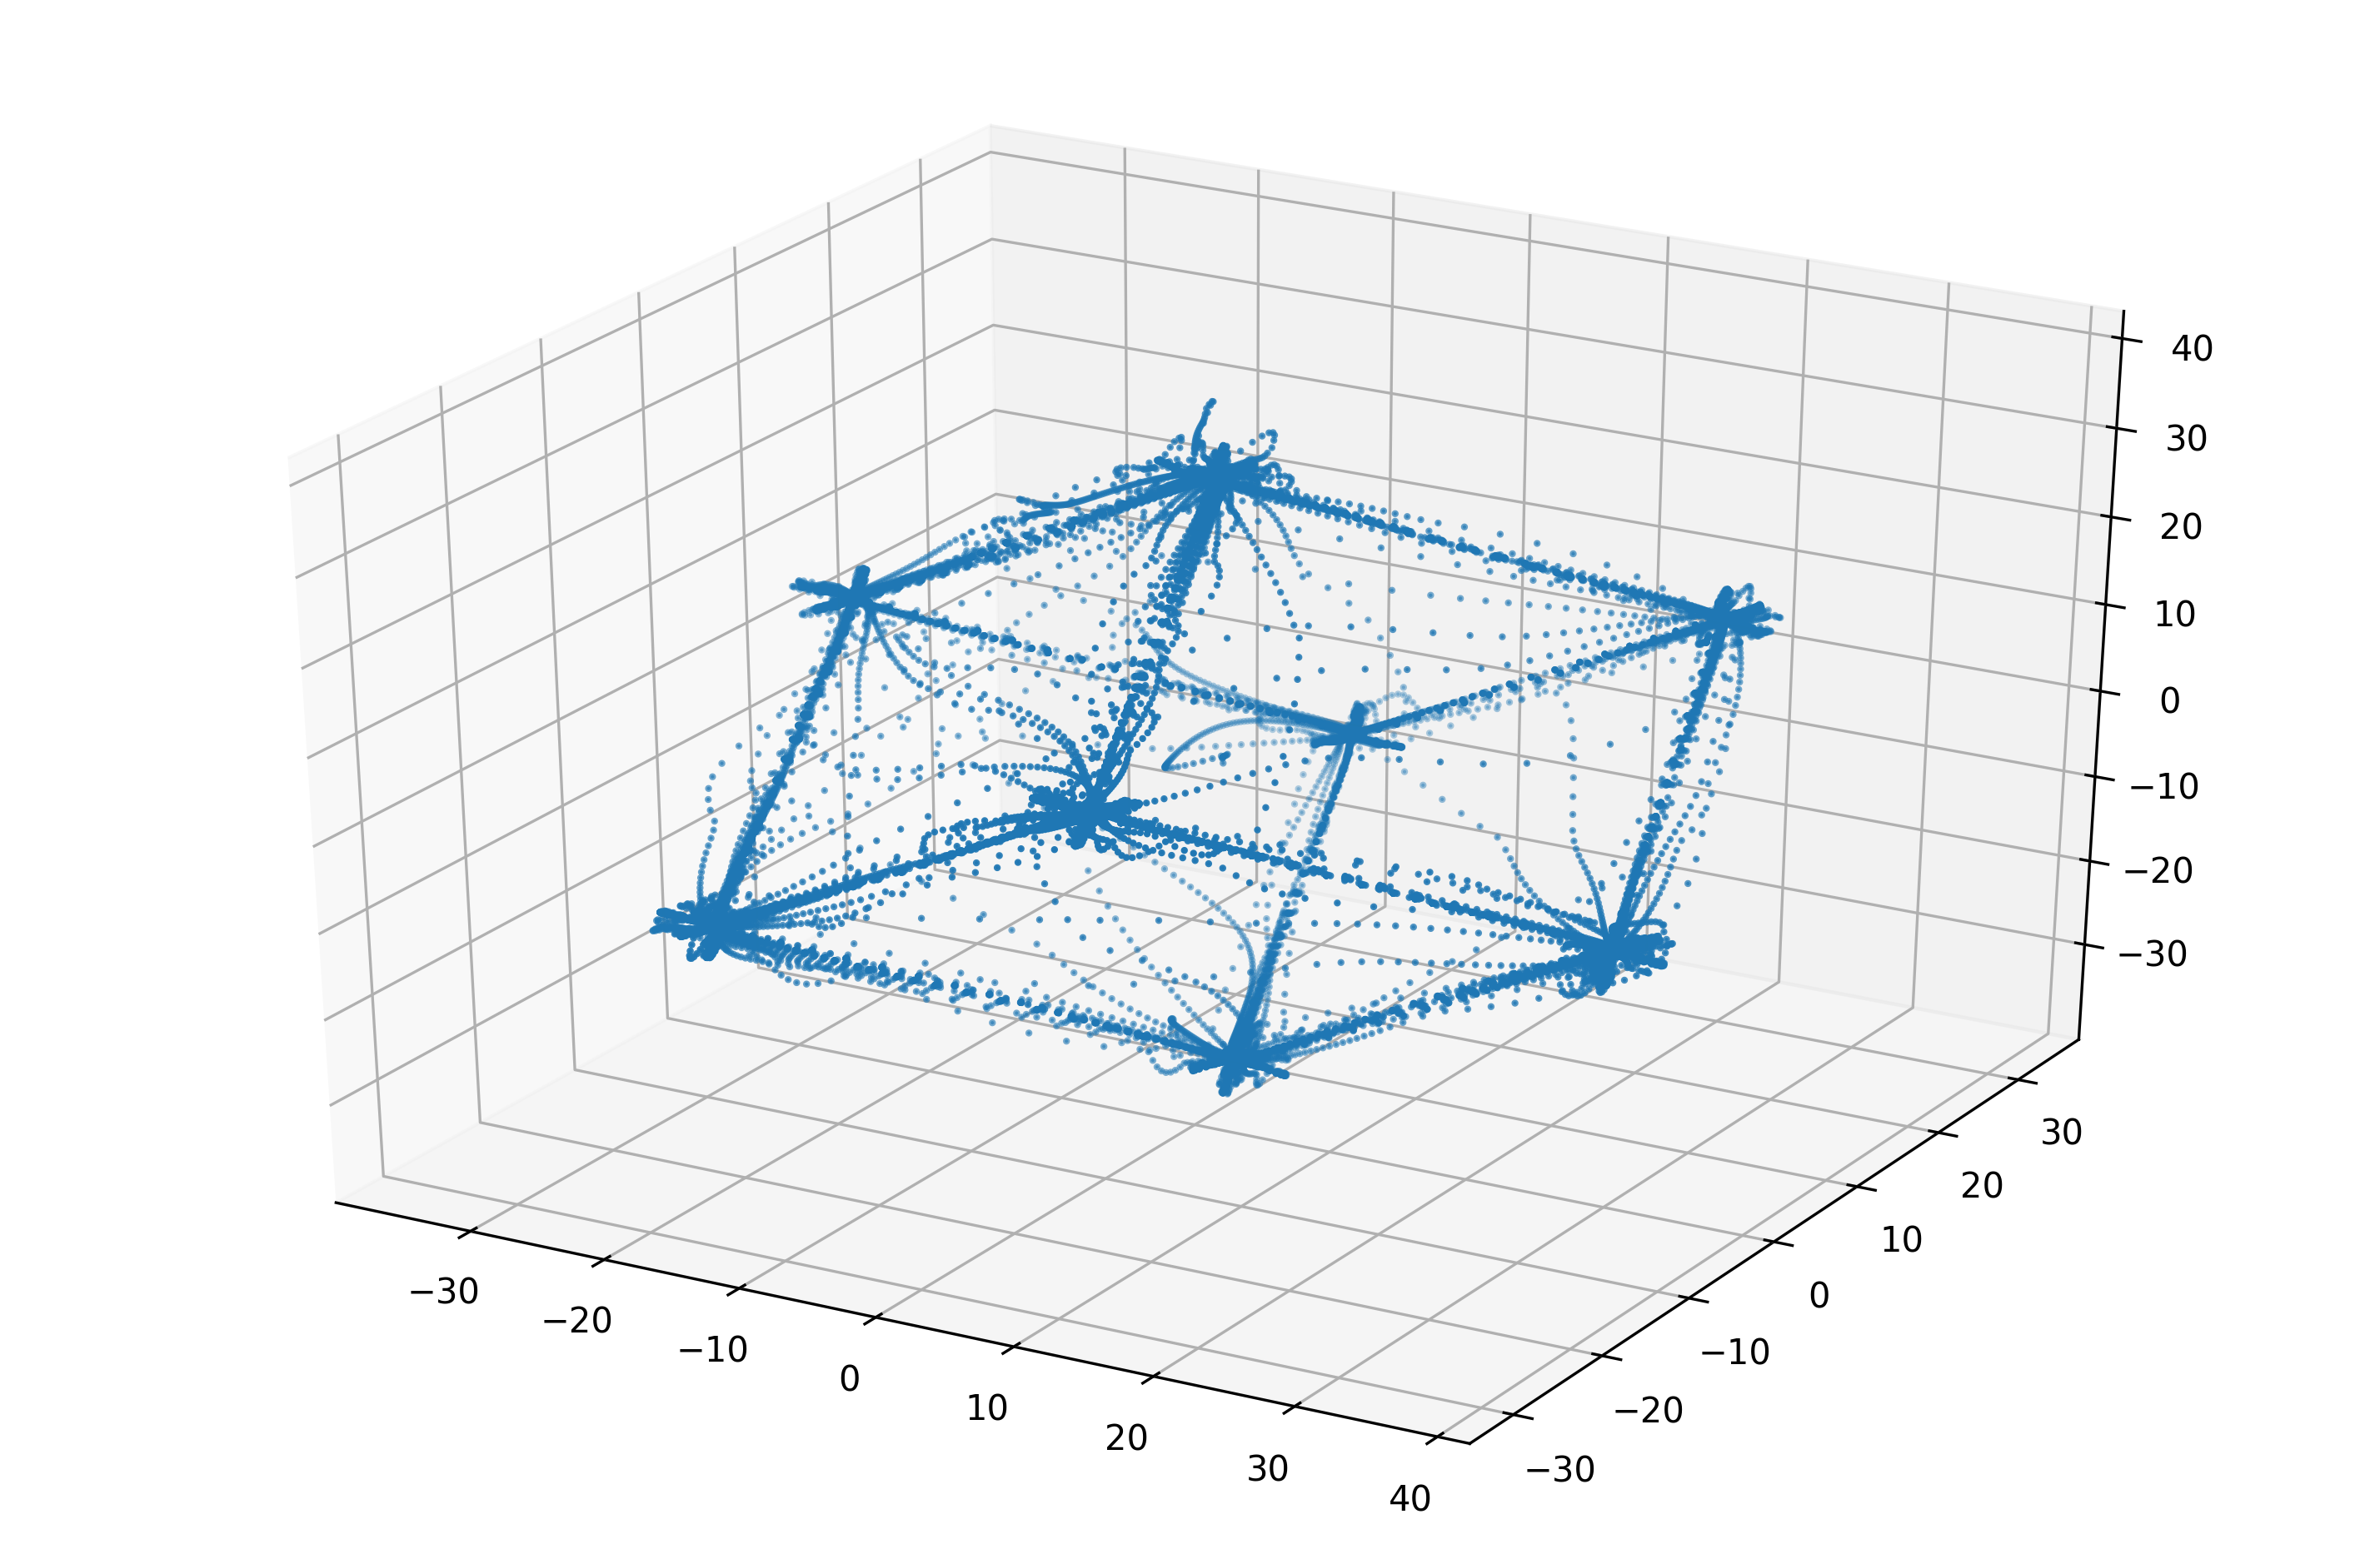

In [9]:
fig = plt.figure(figsize = [12,8], dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc[0], pc[1], pc[2], s=1)
plt.show()

In [ ]:
# Kmeans
pc3 = np.array([pc[0], pc[1], pc[2], pc[3]])
for i in range(20):
    kmeans = KMeans(n_clusters = int(i+1)).fit(pc3.T)
    print(kmeans.inertia_)